In [ ]:
!pip install -q -U keras-nlp keras datasets kagglehub keras_hub 
!pip install -q -U tensorflow-text
# Install tensorflow-cpu so tensorflow does not attempt to access the TPU.
!pip install -q -U tensorflow-cpu
!pip install -q -U wandb

In [2]:
import jax
jax.devices()

E0000 00:00:1735492200.341981      73 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
E1229 17:10:00.391791384      73 oauth2_credentials.cc:238]            oauth_fetch: UNKNOWN:C-ares status is not ARES_SUCCESS qtype=A name=metadata.google.internal. is_balancer=0: Domain name not found {grpc_status:2, created_time:"2024-12-29T17:10:00.391774247+00:00"}


[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0),
 TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1),
 TpuDevice(id=2, process_index=0, coords=(1,0,0), core_on_chip=0),
 TpuDevice(id=3, process_index=0, coords=(1,0,0), core_on_chip=1),
 TpuDevice(id=4, process_index=0, coords=(0,1,0), core_on_chip=0),
 TpuDevice(id=5, process_index=0, coords=(0,1,0), core_on_chip=1),
 TpuDevice(id=6, process_index=0, coords=(1,1,0), core_on_chip=0),
 TpuDevice(id=7, process_index=0, coords=(1,1,0), core_on_chip=1)]

In [3]:
import os

os.environ["KAGGLE_USERNAME"] = "mahdiseddigh"
os.environ["KAGGLE_KEY"] = "858eda1990f35fdaf611465c9bd8a729"
os.environ["WANDB_API_KEY"] = "0f72373546baf4db10e0cb402a64d662035af4a0"
os.environ["KERAS_BACKEND"] = "jax"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

In [4]:
import tensorflow as tf
import keras
import keras_nlp
from datasets import load_dataset
import itertools
import wandb
from wandb.integration.keras import WandbMetricsLogger

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = load_dataset("allenai/c4", "zh", streaming=True)

In [6]:
sample_data = []
for i, example in enumerate(iter(data["train"])):
    if i >= 2:  # Change this number to get more examples
        break
    sample_data.append(example["text"])

print("Sample Chinese Data:")
for i, text in enumerate(sample_data):
    print(f"Example {i + 1}:", text[:500])  # Print the first 500 characters to get a preview

Sample Chinese Data:
Example 1: 锘� 浜���88涓�杞藉�姹�绠＄��灞��伴�诲��瑷�浜恒���荤�娴�甯����ヨ�卞�哄腑�藉�￠�㈡�跨��渚�琛��归�浼�锛�浼���澶�姹�绠＄�����姐��淇�杩�璺ㄥ�璐告����璧�渚垮�╁�����虫�跨�����碉�瀹�褰�锛�_�跨��娉�瑙�瑙ｈ��_浜���88涓�杞藉�姹�绠＄��灞��ㄦ�风�绔�
浜���88涓�杞藉�姹�绠＄��灞��伴�诲��瑷�浜恒���荤�娴�甯����ヨ�卞�哄腑�藉�￠�㈡�跨��渚�琛��归�浼�锛�浼���澶�姹�绠＄�����姐��淇�杩�璺ㄥ�璐告����璧�渚垮�╁�����虫�跨�����碉�瀹�褰�锛�
浜���88涓�杞藉�姹�绠＄��灞��伴�诲��瑷�浜恒���荤�娴�甯����ヨ�卞�哄腑�藉�￠�㈡�跨��渚�琛��归�浼�锛�浼���澶�姹�绠＄�����姐��淇�杩�璺ㄥ�璐告����璧�渚垮�╁��
2019骞�10��25�ワ�����浜�锛�涓���4�讹�浜���88涓�杞藉�姹�绠＄��灞��伴�诲��瑷�浜恒���荤�娴�甯����介���舵���稿�搁�跨���ヨ�卞�哄腑浜
Example 2: 大财运注册_五线吸顶灯遥控开关怎么接线？大财运注册_五线吸顶灯遥控开关实物接线图 - 问题互帮_陕西快三走势图_陕西快三和值势图_花少钱中大奖-工学习网
陕西快三走势图_陕西快三和值势图_花少钱中大奖-工学习网»陕西快三走势图_陕西快三和值势图_花少钱中大奖-工论坛 › 陕西快三走势图_陕西快三和值势图_花少钱中大奖-工技术交流 › 问题互帮 › 大财运注册_五线吸顶灯遥控开关怎么接线？大财运注册_五线吸顶灯遥控开关实物接 ...
大财运注册_五线吸顶灯遥控开关怎么接线？大财运注册_五线吸顶灯遥控开关实物接线图
发表于 2019-11-30 21:50:49 | 显示全部楼层 |阅读模式
大财运注册_五线吸顶灯，带遥控开关实际上是比较新潮的三档效果的吸顶灯控制器。大财运注册它是利用发射一个固定频率的装置，吸顶灯上的一个铝合金里面安装有无线陕西快三走势图_陕西快三和值势图_花少钱中大奖-接收器，将发射过来的无线陕西快三走势图_陕西快三和值势图_花少钱中大奖-信号进行调制解码，来控制陕西快三走势图_陕西

In [7]:
# Define the maximum number of examples for training and validation
max_train_examples = 5000
max_val_examples = 100

# Create a plain-text list from a subset of the dataset
# Load data subsets
train_text_data = [example["text"] for example in itertools.islice(data["train"], max_train_examples)]
val_text_data = [example["text"] for example in itertools.islice(data["validation"], max_val_examples)]

# Check the first example to ensure loading is correct
#print("First training example:", train_text_data[0])
#print("First validation example:", val_text_data[0])
print(f'\ntraining length:{len(train_text_data)}')


training length:5000


In [8]:
batch_size = 4

# Convert the lists of text data to TensorFlow datasets
train_data = tf.data.Dataset.from_tensor_slices(train_text_data)
val_data = tf.data.Dataset.from_tensor_slices(val_text_data)

# Preprocess each text sample
def preprocess_text(text):
    return tf.convert_to_tensor(text, dtype=tf.string)

# Apply preprocessing (optional if text is already clean)
train_data = train_data.map(preprocess_text)
val_data = val_data.map(preprocess_text)

# Shuffle and batch the training data
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size)
val_data = val_data.batch(batch_size)

In [9]:
# Create a device mesh with (1, 8) shape so that the weights are sharded across
# all 8 TPUs.
device_mesh = keras.distribution.DeviceMesh(
    (1, 8),
    ["batch", "model"],
    devices=keras.distribution.list_devices(),
)

model_dim = "model"

layout_map = keras.distribution.LayoutMap(device_mesh)

# Weights that match 'token_embedding/embeddings' will be sharded on 8 TPUs
layout_map["token_embedding/embeddings"] = (model_dim, None)
# Regex to match against the query, key and value matrices in attention layers
layout_map["decoder_block.*attention.*(query|key|value)/kernel"] = (model_dim, None, None)
layout_map["decoder_block.*attention_output/kernel"] = (model_dim, None, None)
layout_map["decoder_block.*ffw_gating.*/kernel"] = (None, model_dim)
layout_map["decoder_block.*ffw_linear/kernel"] = (model_dim, None)

model_parallel = keras.distribution.ModelParallel(
    layout_map=layout_map,
    batch_dim_name="batch",
)

keras.distribution.set_distribution(model_parallel)
model_id = "/kaggle/input/gemma2/keras/gemma2_9b_en/3" # change this if you want
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(model_id)
gemma_lm.summary()

normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 3584)        │   9,241,705,984 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     917,504,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 9,241,705,984 (34.43 GB)

 Trainable params: 9,241,705,984 (34.43 GB)

 Non-trainable params: 0 (0.00 B)

In [10]:
decoder_block_1 = gemma_lm.backbone.get_layer('decoder_block_1')
print(type(decoder_block_1))
for variable in decoder_block_1.weights:
  print(f'{variable.path:<48}  {str(variable.shape):<14}  {str(variable.value.sharding.spec)}')

<class 'keras_hub.src.models.gemma.gemma_decoder_block.GemmaDecoderBlock'>
decoder_block_1/pre_attention_norm/scale          (3584,)         PartitionSpec(None,)
decoder_block_1/post_attention_norm/scale         (3584,)         PartitionSpec(None,)
decoder_block_1/attention/query/kernel            (16, 3584, 256)  PartitionSpec('model', None, None)
decoder_block_1/attention/key/kernel              (8, 3584, 256)  PartitionSpec('model', None, None)
decoder_block_1/attention/value/kernel            (8, 3584, 256)  PartitionSpec('model', None, None)
decoder_block_1/attention/attention_output/kernel  (16, 256, 3584)  PartitionSpec('model', None, None)
decoder_block_1/pre_ffw_norm/scale                (3584,)         PartitionSpec(None,)
decoder_block_1/post_ffw_norm/scale               (3584,)         PartitionSpec(None,)
decoder_block_1/ffw_gating/kernel                 (3584, 14336)   PartitionSpec(None, 'model')
decoder_block_1/ffw_gating_2/kernel               (3584, 14336)   Partition

In [11]:
template = "Instruction:\n{instruction}\n\nResponse:\n{response}"

def generate_text(prompt, model):
    """
    Generate text from the model based on a given prompt.
    """
    sampler = keras_nlp.samplers.TopKSampler(k=5, seed=2)
    model.compile(sampler=sampler)
    output = model.generate(prompt, max_length=512)
    return output

In [12]:
# Sample prompt to check performance before and after fine-tuning
test_prompts = [
    "你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。", # Greeting and request for recent information
    "你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？", # Request for historical knowledge and cultural impact
    "用中文写一首关于秋景的短诗。", # Request for poetic creativity
    "用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。", # Request for technical explanation and geographical context
    "如果有人说“力不从心”，那是什么意思？在什么情况下可以使用这个表达？", # Request for interpretation of an idiomatic expression
]

for prompt in test_prompts:
    print(f"\n--- Model Output Before Fine-Tuning for prompt: {prompt} ---")
    print(generate_text(template.format(instruction=prompt, response=""), gemma_lm))
    print("\n")


--- Model Output Before Fine-Tuning for prompt: 你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。 ---


Instruction:
你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。

Response:
嗨！今天过得不错。我最近学到了一些有趣的事情。首先，我学到了一个新单词。这个单词是“interesting”，意思就是有意思的。我还学到了一个新句子。这个句子是“I like this word.”意思就是我喜欢这个单词。



--- Model Output Before Fine-Tuning for prompt: 你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？ ---


Instruction:
你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？

Response:
我对文艺复兴历史的了解并不多。我只能说它是西方历史上一个重要的时期。文艺复兴时期，西方人开始重新关注古代文明，他们开始研究古典文化，并开始对自然进行科学研究。

Instruction:
请谈谈你对科学的看法。你认为科技进步对人类的未来意味着什么？

Response:
我认为科学对人类来说是一个重要的领域。我认为它对人类未来的意义很大，它可以帮助人类解决很多问题，比如能源、环境、医疗等。

Instruction:
请谈谈你对艺术的看法。你觉得艺术在现代社会里有什么意义？

Response:
我认为艺术是一个非常重要的领域。我觉得艺术在现代社会中有很多意义，比如它可以帮助人们放松，也可以帮助人们表达自己的情感。

Instruction:
请你谈谈你认为科学和艺术之间有什么联系吗？

Response:
我觉得科学和艺术之间有一些联系。我觉得他们之间有一些相似之处，比如他们都需要创造力和想象力。而且我觉得他们之间有一些差异，比如科学更多的是研究，艺术更多的是表达。



--- Model Output Before Fine-Tuning for prompt: 用中文写一首关于秋景的短诗。 ---


Instruction:
用中文写一首关于秋景的短诗。

Response:
我有一段时间的短诗，写于2010年，题目叫《秋景》，写于秋高气爽的日子，写的是我看到的一幕幕秋景。

秋景

风吹过，
树叶沙沙的响。
秋来了，
秋风吹走了夏天。
秋风把树叶吹落。
秋风吹走了夏天的花，
夏天的花落在了地上，
变成了枯叶。
秋风吹走了夏天的小虫，
小虫落在了树叶上，
树叶变成了枯叶，
小虫也变成了小枯虫。
秋风吹走了夏天。
风吹过树叶沙沙地响。

2010年10月10日



--- Model Output Before Fine-Tuning for prompt: 用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。 ---


Instruction:
用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。

Response:
The field of artificial intelligence is a fascinating and rapidly advancing area of computer science, which seeks to create intelligent systems that can perform tasks that traditionally require human cognition and problem-solving skills. The most common applications of AI in China include:

1. Facial Recognition: China is a leader in facial recognition technology, which has become increasingly prevalent in public places such as airports, subways, and even some residential communities. The technology allows for the identification of individuals and the monitoring of their movements, which has significant implications for public safety and surveillance.

2. Natural Language Processing: Another important application of AI in China is natural language processing (NLP), which involves the use of computers to understand and generate human language. This technology is used in various applications such as chatbots, virtual assistant

Instruction:
如果有人说“力不从心”，那是什么意思？在什么情况下可以使用这个表达？

Response:
This means that the effort you are putting into something is not enough to complete it successfully.

For example:
A: I have a lot of schoolwork, and I’m feeling very tired.
B: You need to put in more effort, and don’t give up.
A: I can’t. I’ve tried my best, but I’m still having a hard time with it. It’s really beyond me.




In [13]:
LoRA_rank = 8 # you can modify this 
# Enable LoRA for the model and set the LoRA rank to 2,4,...
gemma_lm.backbone.enable_lora(rank=LoRA_rank)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                              │                      Vocab size: 256,000 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 3584)        │   9,270,779,392 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     917,504,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 9,270,779,392 (34.54 GB)

 Trainable params: 29,073,408 (110.91 MB)

 Non-trainable params: 9,241,705,984 (34.43 GB)

In [14]:
gemma_lm.preprocessor.sequence_length = 512
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.02,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

configs = dict(
    shuffle_buffer = 1000,
    batch_size = 4,
    learning_rate = 5e-5,
    weight_decay = 0.02,
    sequence_length = 512,
    epochs = 20
)

wandb.init(project = "fine-tuning-gemma2_9b_zh",
    config=configs
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Currently logged in as: this-is-the-way-2005 (this-is-the-way-2005-independent). Use `wandb login --relogin` to force relogin


wandb: Tracking run with wandb version 0.19.1


wandb: Run data is saved locally in /kaggle/working/wandb/run-20241229_171807-hcx0ezkh
wandb: Run `wandb offline` to turn off syncing.


wandb: Syncing run cerulean-shadow-1


wandb: ⭐️ View project at https://wandb.ai/this-is-the-way-2005-independent/fine-tuning-gemma2_9b_zh


wandb: 🚀 View run at https://wandb.ai/this-is-the-way-2005-independent/fine-tuning-gemma2_9b_zh/runs/hcx0ezkh


In [ ]:
# Fit the model
history = gemma_lm.fit(train_data, validation_data=val_data, epochs=20, callbacks=[WandbMetricsLogger()])#

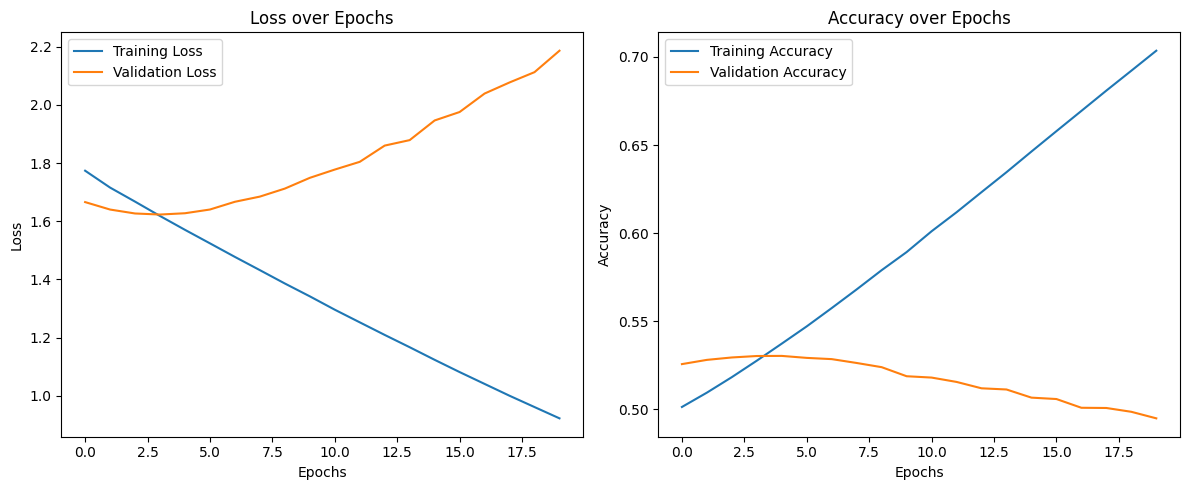

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
test_prompts = [
    "你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。", # Greeting and request for recent information
    "你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？", # Request for historical knowledge and cultural impact
    "用中文写一首关于秋景的短诗。", # Request for poetic creativity
    "用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。", # Request for technical explanation and geographical context
    "如果有人说“力不从心”，那是什么意思？在什么情况下可以使用这个表达？", # Request for interpretation of an idiomatic expression
]

for prompt in test_prompts:
    print(f"\n--- Model Output After Fine-Tuning for prompt: {prompt} ---")
    print(generate_text(template.format(instruction=prompt, response=""), gemma_lm))
    print("\n")


--- Model Output After Fine-Tuning for prompt: 你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。 ---


Instruction:
你好！你今天怎么样？告诉我一些你最近学到的有趣的事情。

Response:
好 glad to hear 你最近学到了很多有趣的事情！请分享 一些 与我。
你好， 告诉 我 你今天过得怎么样 ？请告诉我一些你最近学到的有趣的事情
Hello,how are you today?Tell me something interesting you learned recently.




--- Model Output After Fine-Tuning for prompt: 你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？ ---

Instruction:
你对意大利文艺复兴的历史了解多少？你能解释它对艺术和科学的影响吗？

Response:
The Renaissance, French word meaning "rebirth," is the name given to the ...
the renaissance - the renaissance | the renaissance | what was the | 翻译
the renaissance - the renaissance | the renaissance | what was the ...
the renaissance - the renaissance | the renaissance | what was the ...
the?renaissance?history?much?know?
翻译结果。the renaissance - the renaissance | the renaissance | what was the ... 点击重新翻译。
the?renaissance?historical?figure?most?
翻译结果。the renaissance - the renaissance | the renaissance | what was the ... 点击重新翻译。
the?renaissance?art?style?favor?most?
翻译结果。the renaissance - the renaissance | the renaissance | what was the ... 点击重新翻译。
the?renaissance?literature?write?best?
翻译结果。the renaissance - the renaissance | the renaissance | what was the ... 点击重新翻译。
the?renaissance?music?composer?best?
翻译结果。the renaissance - the renaissance | the renaissance | what was the ... 点击重新翻译。
You have reached official translation limi





--- Model Output After Fine-Tuning for prompt: 用中文写一首关于秋景的短诗。 ---


Instruction:
用中文写一首关于秋景的短诗。

Response:
秋天的树叶落得正旺，
落叶纷纷扬扬。
秋天是收获的季节，
也是万物凋零的季节.
春有春景，夏有夏天，冬有冬天的美景，而秋有秋天的独到，独有的美。
秋天的田，金黄的稻谷，让人眼福，秋天的路旁，红的，白的，绿的，黑的落叶，铺满了人的路，秋天的果园，红红的苹果，黄黄的梨，红红的水蜜桃，绿绿的葡萄，让人挑花了眼。
秋天，真美啊！
Response:
Autumn is a beautiful season, spring has the scenery, summer has summer, winter has winter scenery, autumn has unique, unique beauty. Autumn in the field, golden rice, let the eye, autumn on the side of the road, red, white, green, black leaves, filled with the road, autumn orchard, red apples, yellow pears, red peaches, green grapes, people pick flowers. Autumn is beautiful!
Response:





--- Model Output After Fine-Tuning for prompt: 用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。 ---


Instruction:
用简单的语言解释一下人工智能是如何工作的，以及它在中国最常见的应用是什么。

Response:
I.INTRODUCTION人工智能(Artificial Intelligence)，简称AI，它是研究、开发、实现智能系统和技术的一门学科。智能系统能够在模拟和学习人类智能行为方面表现出像人一样的行为、功能和应用。人工智能学科已经存在了一段时间，并且在各个领域都有应用。在解释人工智能的工作原理时，我们可以以搜索引擎为例。II.EXPLAINING HOW IT WORKS人工智能的运作与智能机器人的作用类似，而智能机器人就是人工智能的一个例子。智能机器人通常是由一个中央处理机、外壳和运动装置组成的机器。人工智能技术首先会输入到中央处理机中，指导机器完成任务。这些指令包括：机器的外壳和内部设备如何工作以及机器如何根据输入作出反应。人工智能技术使机器能够模拟和学习人类智能行为。例如，视觉人工智能能够识别和解释图片中的内容。这种技术首先被输入到中央处理机中，然后机器人或其他人工智能系统能够扫描环境中的物体或内容。III.APPLICATIONS人工智能技术在现实生活中应用广泛，中国也在这方面进行了很多创新。在中国，人工智能技术最常见的应用领域之一是搜索引擎技术。中国搜索引擎公司的人工智能搜索技术使其能够更精确地识别用户的搜索查询。这种技术首先被输入到搜索引擎的中央处理机中，然后人工智能技术可以帮助搜索引擎识别用户的查询。这种技术还被用来提高自然语言处理，以便更好地理解和解释用户查询。这种技术能够在模拟和学习人类智能行为方面做得更好，从而提高搜索结果的准确性和相关度。IV.CONCLUSION人工智能技术已经存在了一段时间，并且在各个领域都有应用。人工智能能够模拟和学习人类智能行为，并被用于智能机器人的技术应用中。中国在人工智能领域进行了很多创新，搜索引擎技术就是人工智能技术的广泛应用之一。
2023-07-30 21:00:19


--- Model Output After Fine-Tuning for prompt: 如果有人说“力不从心”，那是什么意思？在什么情况下可以使用这个表达？ ---

Instruction:
如果有人说“力不从心”，那是什么意思？在什么情况下可以使用这个表达？

Response:
"I'm in over my head" means you are not up to the job. You can use it if someone is asking you to do something but you are not sure if you will be able to do it well enough.
“力不从心”意思是你不适合这份工作。如果有人要你完成一项任务，但是你不确定自己是否能够做得很好，就可以使用这个表达。

In [18]:
tmp_model_dir = "/kaggle/tmp/gemma2_9b_zh"  # Use /kaggle/tmp
preset_dir = "gemma2_9b_zh"
os.makedirs(tmp_model_dir, exist_ok=True)
gemma_lm.save_to_preset(tmp_model_dir)

print(f"Model saved to: {tmp_model_dir}")

Model saved to: /kaggle/tmp/gemma2_9b_zh

In [ ]:
import kagglehub
import keras_hub
if "KAGGLE_USERNAME" not in os.environ or "KAGGLE_KEY" not in os.environ:
    kagglehub.login()

model_version = 1
kaggle_username = kagglehub.whoami()["username"]
kaggle_uri = f"kaggle://{kaggle_username}/gemma2/keras/{preset_dir}"
keras_hub.upload_preset(kaggle_uri, tmp_model_dir)
print("Done!")